In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [55]:
df = pd.read_csv("/home/wesley/Downloads/flightlogs/20210203/2021-02-03_09-27-30_v2.csv")
df.head()

,latitude,longitude,altitude(m),ultrasonicHeight(m),speed(mps),distance(m),max_altitude(m),max_ascent(m),max_speed(mps),max_distance(m),...,rcTransform,rcJoystickMode,appMode,FlyControllerSerialNumber_legacy,RemoteSerialNumber_legacy,BatterySerialNumber_legacy,Battery2SerialNumber,frontAvoidDist,backAvoidDist,isBrakingToAvoid
0,-22.926984,-43.637102,1.4,1.6,3.61,4.02,1.4,1.4,3.61,4.02,...,0,2,1,NaN,NaN,NaN,NaN,7.8,7.8,0
1,-22.926984,-43.637102,1.8,2.0,4.10,0.24,1.8,1.8,4.10,4.02,...,0,2,1,NaN,NaN,NaN,NaN,7.8,7.8,0
2,-22.926984,-43.637102,2.2,2.4,4.50,0.26,2.2,2.2,4.50,4.02,...,0,2,1,NaN,NaN,NaN,NaN,7.8,7.8,0
3,-22.926985,-43.637102,2.7,2.9,4.80,0.27,2.7,2.7,4.80,4.02,...,0,2,1,NaN,NaN,NaN,NaN,7.8,7.8,0
4,-22.926985,-43.637102,3.2,3.4,4.90,0.27,3.2,3.2,4.90,4.02,...,0,2,1,NaN,NaN,NaN,NaN,7.8,7.7,0


In [56]:
# df.keys().tolist()

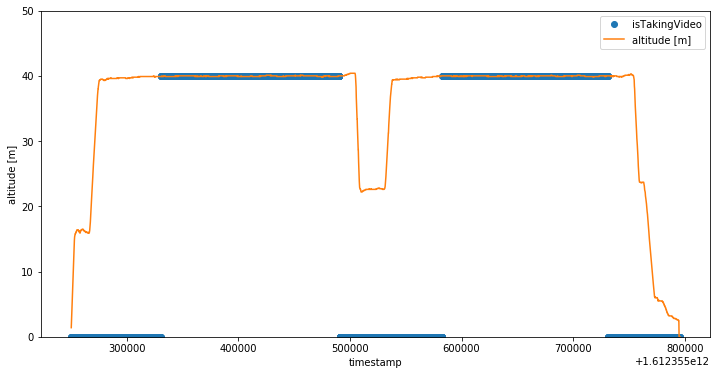

In [57]:
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], 40*df['isTakingVideo'], 'o', )
plt.plot(df['timestamp'],  df['altitude(m)'], label='altitude [m]')
plt.legend()
plt.ylim([0, 50])
plt.ylabel('altitude [m]')
plt.xlabel('timestamp')
plt.show()

[ 712 6897]


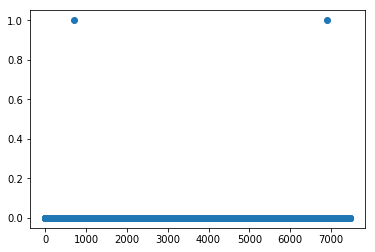

In [23]:
mask = df['isTakingVideo'] == True
diff = np.diff(mask)

plt.plot(diff, 'o')

breaking_indexes = np.where(diff == 1)[0]
print(breaking_indexes)

In [24]:
split_dfs = np.split(df, breaking_indexes+1, axis=0)
len(split_dfs)

3

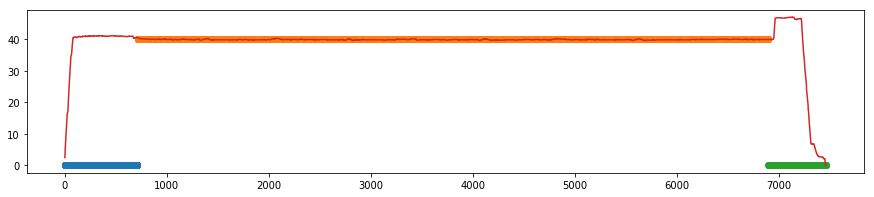

In [25]:
plt.figure(figsize=(15,3))
for d in range(len(split_dfs)):    
    plt.plot(40*split_dfs[d]['isTakingVideo'], 'o')
    
plt.plot(df['altitude(m)'])

In [28]:
def split_df(df):
    mask = df['isTakingVideo'] == True
    diff = np.diff(mask)
    breaking_indexes = np.where(diff == 1)[0]
    split_df = np.split(df, breaking_indexes+1, axis=0)
    
    return split_df    

In [26]:
list_csvs = glob.glob("/home/wesley/Downloads/flightlogs/20190601/2019-06-01_10-37-51_v2.csv", recursive=True)

In [27]:
for csv in list_csvs:
    df = pd.read_csv(csv)
    splitted_dfs = split_df(df)
    
    count = 0
    part = 0
    for splitted_df in splitted_dfs:
        if count % 2 != 0:            
            splitted_df.to_csv(csv.replace('.csv', f'_part{part}.csv'), index=False)
            part += 1
        count += 1    

NameError: name 'split_df' is not defined

2.4724999999999997

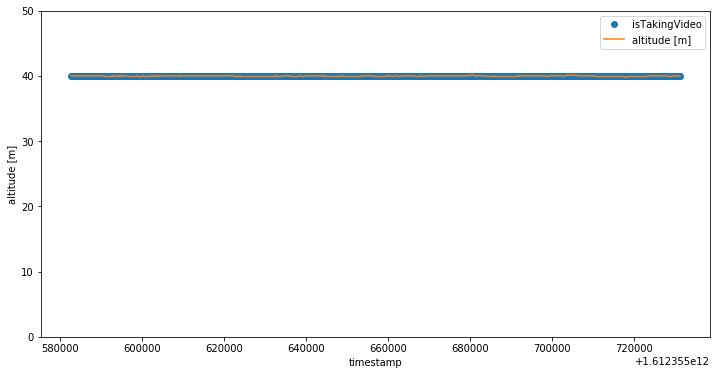

In [60]:
df_part = pd.read_csv('/home/wesley/Downloads/flightlogs/20210203/20210203_DJI_0059.csv')

plt.figure(figsize=(12,6))
plt.plot(df_part['timestamp'], 40*df_part['isTakingVideo'], 'o', )
plt.plot(df_part['timestamp'], df_part['altitude(m)'], label='altitude [m]')
plt.legend()
plt.ylabel('altitude [m]')
plt.xlabel('timestamp')
plt.ylim([0, 50])

(df_part['time(millisecond)'].iloc[-1] - df_part['time(millisecond)'].iloc[0])/1e3/60